In [2]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = "./dataset_mood_smartphone.csv"

In [6]:
df = pd.read_csv(file_path)

## Remove outliers from outside the range specified
1<mood<10

-2<arousal<2

-2<valence<2

0<activity<1

In [8]:
good_data = []
for i in range(len(df)):
    variable = df.loc[i, 'variable']
    value = df.loc[i, 'value']
    
    if variable == "mood":
        if pd.isna(value) or (value >= 1 and value <= 10):
            good_data.append(df.loc[i])

    elif variable == "circumplex.arousal":
        if pd.isna(value) or (value >= -2 and value <= 2):
            good_data.append(df.loc[i])
    elif variable == "circumplex.valence":
        if pd.isna(value) or (value >= -2 and value <= 2):
            good_data.append(df.loc[i])
    elif variable == "activity":
        if pd.isna(value) or (value >= 0 and value <= 1):
            good_data.append(df.loc[i])
    elif variable == "call" or variable == "sms":
        if pd.isna(value) or (value == 0 or value == 1):
            good_data.append(df.loc[i])

    else: 
        good_data.append(df.loc[i])
df_cleaned = pd.DataFrame(good_data)

In [9]:
df_cleaned.isna().sum()

Unnamed: 0      0
id              0
time            0
variable        0
value         202
dtype: int64

### The original dataset is clean and can be used for other outlier processing!

## Remove outliers from non-range variables

In [28]:
print((set((df["variable"]))))

{'appCat.communication', 'circumplex.arousal', 'appCat.other', 'appCat.utilities', 'sms', 'screen', 'appCat.social', 'appCat.office', 'activity', 'appCat.finance', 'appCat.travel', 'appCat.weather', 'circumplex.valence', 'mood', 'appCat.entertainment', 'appCat.game', 'call', 'appCat.builtin', 'appCat.unknown'}


In [29]:
print(len(set((df["variable"]))))

19


In [30]:
ranges = df.groupby("variable")["value"].agg(["min", "max"])
print("Variables and their ranges without outliers removed")
print(ranges)

Variables and their ranges without outliers removed
                            min        max
variable                                  
activity                  0.000      1.000
appCat.builtin       -82798.871  33960.246
appCat.communication      0.006   9830.777
appCat.entertainment     -0.011  32148.677
appCat.finance            0.131    355.513
appCat.game               1.003   5491.793
appCat.office             0.003  32708.818
appCat.other              0.014   3892.038
appCat.social             0.094  30000.906
appCat.travel             0.080  10452.615
appCat.unknown            0.111   2239.937
appCat.utilities          0.246   1802.649
appCat.weather            1.003    344.863
call                      1.000      1.000
circumplex.arousal       -2.000      2.000
circumplex.valence       -2.000      2.000
mood                      1.000     10.000
screen                    0.035   9867.007
sms                       1.000      1.000


#### outlier replacement using standard deviation

In [23]:
variables = [
    'appCat.utilities', 'appCat.travel', 'appCat.other',
    'appCat.finance', 'appCat.social', 'appCat.game',
    'appCat.unknown', 'appCat.builtin', 'appCat.office',
    'appCat.weather', 'appCat.communication', 'appCat.entertainment'
]

cleaned_dfs = []

for var in variables:
    rows = df[df['variable'] == var].copy()
    
    empty_rows = rows[rows['value'].isna()]
    present_rows = rows[rows['value'].notna()]

    mean = present_rows['value'].mean()
    std = present_rows['value'].std()

    lb = mean - 2 * std
    present_rows.loc[present_rows['value'] < lb, 'value'] = lb

    ub = mean + 2 * std
    present_rows.loc[present_rows['value'] > ub, 'value'] = ub

    final_df = pd.concat([present_rows, empty_rows])
    cleaned_dfs.append(final_df)

everything_else = df[~df['variable'].isin(variables)]

df_SD_outliers = pd.concat([everything_else] + cleaned_dfs).sort_index()


In [25]:
len(df_SD_outliers)

376912

In [33]:
print(len(df))

376912


In [27]:
ranges = df_SD_outliers.groupby("variable")["value"].agg(["min", "max"])
print("Variables and their ranges outliers removed through SD")

print(ranges)

Variables and their ranges outliers removed through SD
                             min          max
variable                                     
activity                0.000000     1.000000
appCat.builtin       -813.440223   850.516747
appCat.communication    0.006000   301.169293
appCat.entertainment   -0.011000   563.497433
appCat.finance          0.131000   100.191974
appCat.game             1.003000   782.682107
appCat.office           0.003000   921.781655
appCat.other            0.014000   251.373548
appCat.social           0.094000   595.505598
appCat.travel           0.080000   537.949464
appCat.unknown          0.111000   284.353816
appCat.utilities        0.246000   140.455819
appCat.weather          1.003000    70.035575
call                    1.000000     1.000000
circumplex.arousal     -2.000000     2.000000
circumplex.valence     -2.000000     2.000000
mood                    1.000000    10.000000
screen                  0.035000  9867.007000
sms                     1

In [29]:
len(df_SD_outliers)

376912

#### removing any negative data points from the builtin and entertainment variables

In [47]:
df_SD_outliers = df_SD_outliers[
    ~((df_SD_outliers["variable"].isin(["appCat.builtin", "appCat.entertainment"])) &
      (df_SD_outliers["value"] < 0))
]

ranges = df_SD_outliers.groupby("variable")["value"].agg(["min", "max"])
print("Variables and their ranges outliers removed through SD + negative values removed")

print(ranges)

Variables and their ranges outliers removed through SD + negative values removed
                        min          max
variable                                
activity              0.000     1.000000
appCat.builtin        0.001   850.516747
appCat.communication  0.006   301.169293
appCat.entertainment  0.001   563.497433
appCat.finance        0.131   100.191974
appCat.game           1.003   782.682107
appCat.office         0.003   921.781655
appCat.other          0.014   251.373548
appCat.social         0.094   595.505598
appCat.travel         0.080   537.949464
appCat.unknown        0.111   284.353816
appCat.utilities      0.246   140.455819
appCat.weather        1.003    70.035575
call                  1.000     1.000000
circumplex.arousal   -2.000     2.000000
circumplex.valence   -2.000     2.000000
mood                  1.000    10.000000
screen                0.035  9867.007000
sms                   1.000     1.000000


In [49]:
len(df_SD_outliers)

376908

### Moving forward with the data frame created using SD method of outlier removal!!

## finding missing values

In [109]:
counter = 0
for entry in df["value"]:
    if pd.isna(entry):
        counter += 1

In [111]:
print(counter)

202


In [101]:
df_SD_outliers.isna().sum()

Unnamed: 0      0
id              0
time            0
variable        0
value         202
dtype: int64

In [105]:
missing_data = df_SD_outliers[df_SD_outliers["value"].isna()].groupby("variable").size()
print(missing_data)

variable
circumplex.arousal     46
circumplex.valence    156
dtype: int64


## Replacing missing values with mean or median value

Mean

In [53]:
valence_only = df_SD_outliers[df_SD_outliers["variable"].isin(["circumplex.valence"])]["value"]
arousal_only = df_SD_outliers[df_SD_outliers["variable"].isin(["circumplex.arousal"])]["value"]

In [55]:
val_mean_list = []

for value in valence_only:
    if not pd.isna(value):
        val_mean_list.append(value)
        
aro_mean_list = []

for value in arousal_only:
    if not pd.isna(value):
        aro_mean_list.append(value)

In [57]:
mean_val = statistics.mean(val_mean_list)
print("Mean valence:", mean_val)

mean_aro = statistics.mean(aro_mean_list)
print("Mean arousal:", mean_aro)

Mean valence: 0.6878075451066157
Mean arousal: -0.09862426299803466


In [59]:
df_valence_mean = df_SD_outliers.copy()

In [61]:
for i in range(len(df_valence_mean)):
    if df_valence_mean.iloc[i]["variable"] == "circumplex.valence":
        if pd.isna(df_valence_mean.iloc[i]["value"]):
            df_valence_mean.iloc[i, df_valence_mean.columns.get_loc("value")] = mean_val

In [62]:
for i in range(len(df_valence_mean)):
    if df_valence_mean.iloc[i]["variable"] == "circumplex.arousal":
        if pd.isna(df_valence_mean.iloc[i]["value"]):
            df_valence_mean.iloc[i, df_valence_mean.columns.get_loc("value")] = mean_aro

In [63]:
df_valence_mean.to_csv("mean_substitution.csv", index = False)

In [61]:
len(df_valence_mean)

374843

Median

In [62]:
val_median_list = []

for value in valence_only:
    if not pd.isna(value):
        val_median_list.append(value)
        
aro_median_list = []

for value in arousal_only:
    if not pd.isna(value):
        aro_median_list.append(value)

In [63]:
median_val = statistics.median(val_median_list)
print("Median valence:", median_val)

median_aro = statistics.median(aro_median_list)
print("Median arousal:", median_aro)

Median valence: 1.0
Median arousal: 0.0


In [64]:
df_valence_median = df_SD_outliers.copy()

In [65]:
for i in range(len(df_valence_median)):
    if df_valence_mean.iloc[i]["variable"] == "circumplex.valence":
        if pd.isna(df_valence_median.iloc[i]["value"]):
            df_valence_median.iloc[i, df_valence_median.columns.get_loc("value")] = median_val

In [66]:
for i in range(len(df_valence_median)):
    if df_valence_mean.iloc[i]["variable"] == "circumplex.arousal":
        if pd.isna(df_valence_median.iloc[i]["value"]):
            df_valence_median.iloc[i, df_valence_median.columns.get_loc("value")] = median_aro

In [67]:
# df_valence_median.to_csv("median_substitution.csv", index = False)

## Replacing missing values with previous value LOCF

In [68]:
locf_df =df_SD_outliers.copy()
missing_arousal = locf_df['variable'] == 'circumplex.arousal'
locf_df.loc[missing_arousal, 'value'] = locf_df.loc[missing_arousal, 'value'].ffill()

missing_valence = locf_df['variable'] == 'circumplex.valence'
locf_df.loc[missing_valence, 'value'] = locf_df.loc[missing_valence, 'value'].ffill()

In [69]:
# locf_df.to_csv("locf_df.csv", index = False)

## Replacing missing values with following value NOCB

In [71]:
nocb_df =df_SD_outliers.copy()
missing_arousal = locf_df['variable'] == 'circumplex.arousal'
nocb_df.loc[missing_arousal, 'value'] = nocb_df.loc[missing_arousal, 'value'].bfill()

missing_valence = locf_df['variable'] == 'circumplex.valence'
nocb_df.loc[missing_valence, 'value'] = nocb_df.loc[missing_valence, 'value'].bfill()

In [72]:
# nocb_df.to_csv("nocb_df.csv", index = False)

### Checking plots

In [108]:
file_path = "./mean_substitution.csv"
df = pd.read_csv(file_path)

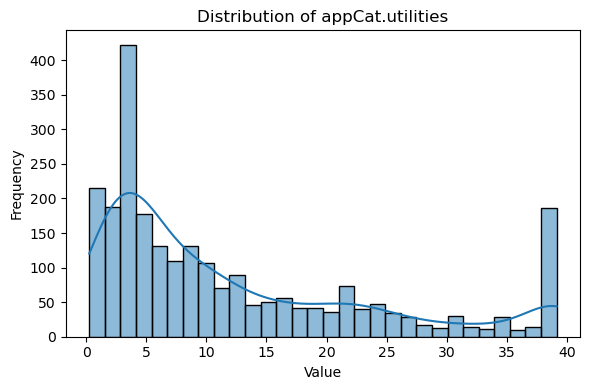

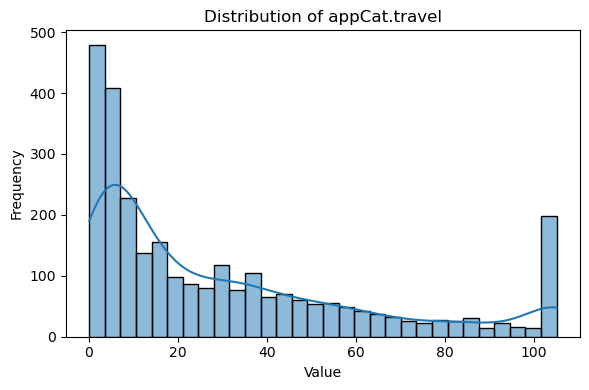

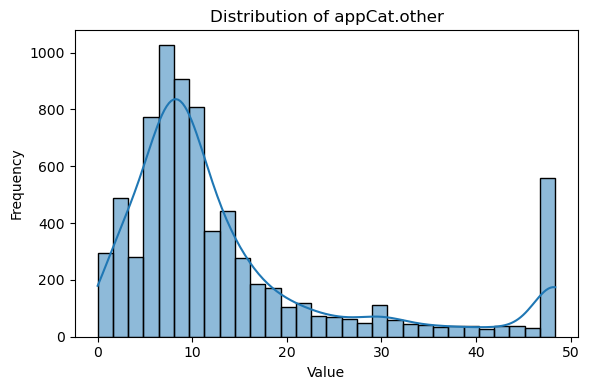

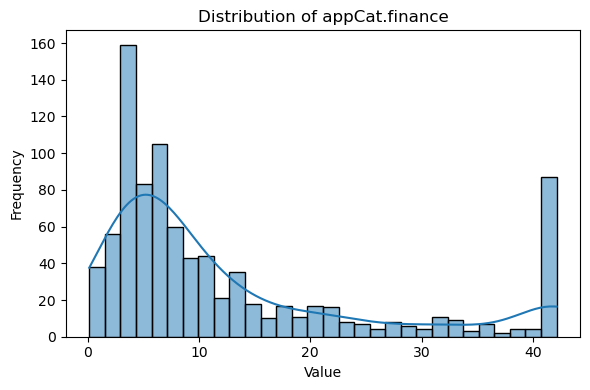

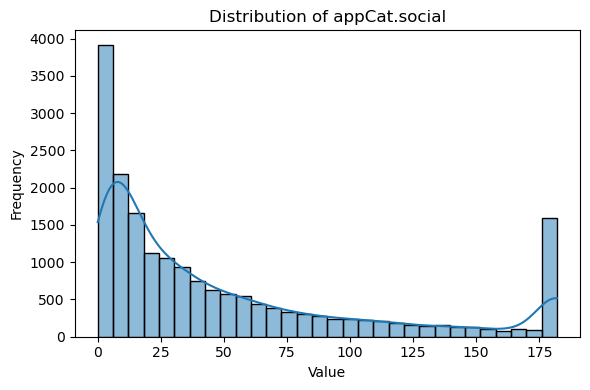

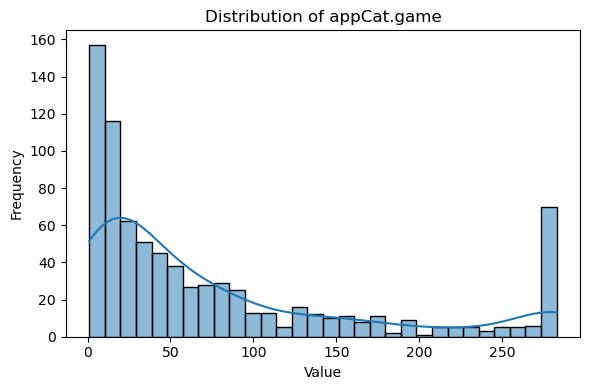

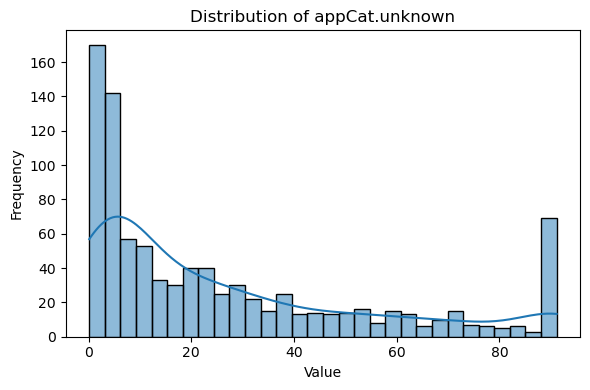

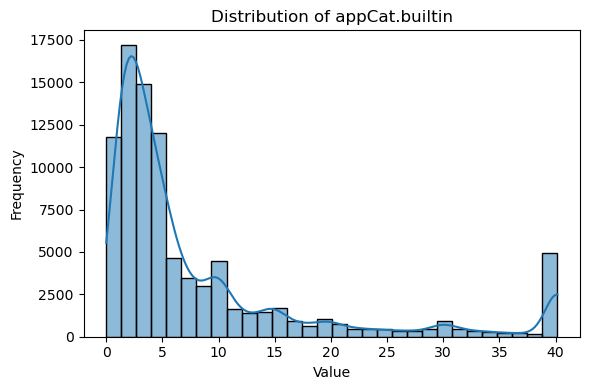

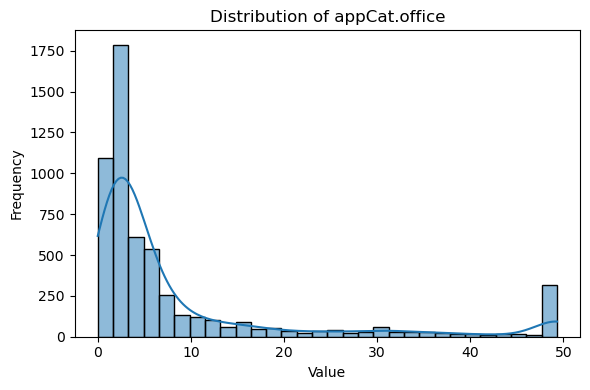

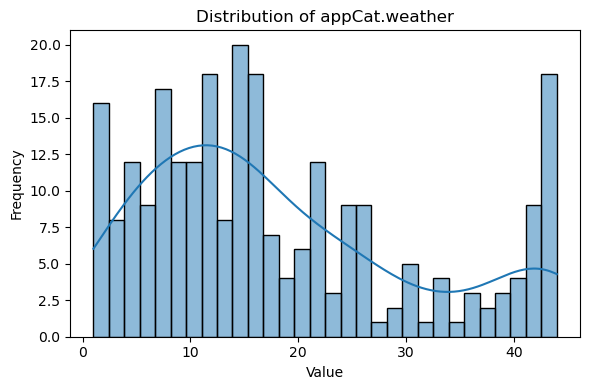

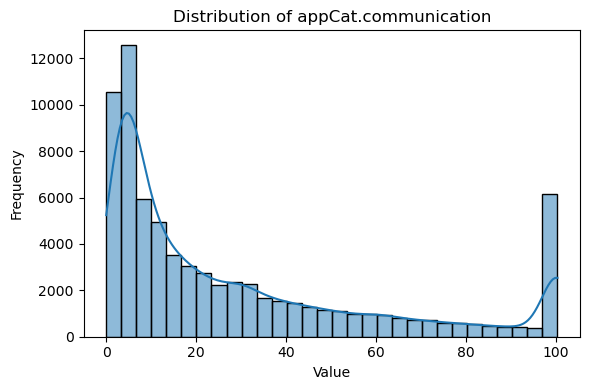

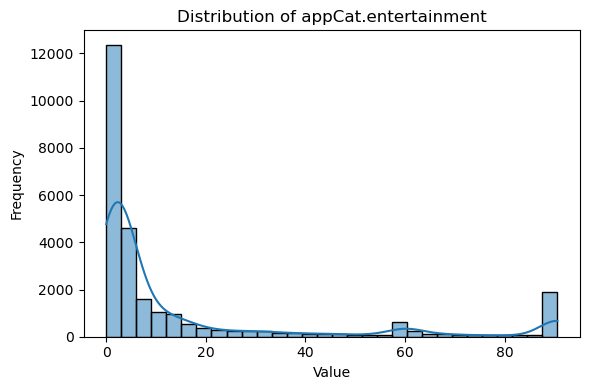

In [110]:
variables_to_plot = [
    'appCat.utilities', 'appCat.travel', 'appCat.other', 'appCat.finance',
    'appCat.social', 'appCat.game', 'appCat.unknown', 'appCat.builtin',
    'appCat.office', 'appCat.weather', 'appCat.communication', 'appCat.entertainment'
]

for var in variables_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df[df["variable"] == var], x="value", kde=True, bins=30)
    plt.title(f"Distribution of {var}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


## Imputing into daily data based dataset -- using mean

In [24]:
file_path = "./final_dataset.csv"
df = pd.read_csv(file_path)

In [26]:
df.isna().sum()

day                        0
day_id                     0
id                         0
mood                       0
activity                 103
circumplex.valence         0
circumplex.arousal         0
appCat.other             145
appCat.finance          1014
appCat.social            281
appCat.travel            810
appCat.game             1037
appCat.builtin            91
appCat.communication     103
call                     492
appCat.unknown           975
appCat.office            951
appCat.weather          1109
sms                      796
appCat.entertainment     422
screen                    84
appCat.utilities         799
target                     0
dtype: int64

### Imputing

In [28]:
app_categories = ['appCat.builtin', 'appCat.communication', 'call', 'activity', 'appCat.utilities', 'appCat.entertainment', 'appCat.unknown', 'mood', 'circumplex.valence', 'appCat.social', 'appCat.game', 'appCat.finance', 'appCat.weather', 'sms','circumplex.arousal', 'appCat.travel', 'appCat.office', 'appCat.other', 'screen']
mean_dict = dict()
for column in app_categories:
    base_list = df[column].dropna().tolist()
    if column == "activity":
        mean_value = statistics.mean(base_list)
    else:
        mean_value = 0
    df[column] = df[column].fillna(mean_value)
    mean_dict[column] = mean_value

In [30]:
mean_dict

{'appCat.builtin': 0,
 'appCat.communication': 0,
 'call': 0,
 'activity': 0.11987814702814238,
 'appCat.utilities': 0,
 'appCat.entertainment': 0,
 'appCat.unknown': 0,
 'mood': 0,
 'circumplex.valence': 0,
 'appCat.social': 0,
 'appCat.game': 0,
 'appCat.finance': 0,
 'appCat.weather': 0,
 'sms': 0,
 'circumplex.arousal': 0,
 'appCat.travel': 0,
 'appCat.office': 0,
 'appCat.other': 0,
 'screen': 0}

In [32]:
app_categories = ['appCat.builtin', 'call', 'sms','appCat.communication', 'activity', 'appCat.utilities', 'appCat.entertainment', 'appCat.unknown', 'mood', 'circumplex.valence', 'appCat.social', 'appCat.game', 'appCat.finance', 'appCat.weather', 'circumplex.arousal', 'appCat.travel', 'appCat.office', 'appCat.other', 'screen']
for column in app_categories:
    print(f"Range for {column}")
    print("Min:", df[column].min(), "Max:", df[column].max())

Range for appCat.builtin
Min: 0.0 Max: 3531.816125044548
Range for call
Min: 0.0 Max: 31.0
Range for sms
Min: 0.0 Max: 15.0
Range for appCat.communication
Min: 0.0 Max: 10511.695206128632
Range for activity
Min: 0.0 Max: 0.5494297847746124
Range for appCat.utilities
Min: 0.0 Max: 1652.1282645834774
Range for appCat.entertainment
Min: 0.0 Max: 3965.75530426584
Range for appCat.unknown
Min: 0.0 Max: 1489.9524370336942
Range for mood
Min: 3.0 Max: 9.333333333333334
Range for circumplex.valence
Min: -1.25 Max: 2.0
Range for appCat.social
Min: 0.0 Max: 12452.362911288452
Range for appCat.game
Min: 0.0 Max: 3430.952398128177
Range for appCat.finance
Min: 0.0 Max: 543.5432857489047
Range for appCat.weather
Min: 0.0 Max: 303.357
Range for circumplex.arousal
Min: -2.0 Max: 2.0
Range for appCat.travel
Min: 0.0 Max: 1636.648545719229
Range for appCat.office
Min: 0.0 Max: 1389.1390404390668
Range for appCat.other
Min: 0.0 Max: 1424.031478310208
Range for screen
Min: 0.0 Max: 36204.10500144956


In [34]:
df.isna().sum()

day                     0
day_id                  0
id                      0
mood                    0
activity                0
circumplex.valence      0
circumplex.arousal      0
appCat.other            0
appCat.finance          0
appCat.social           0
appCat.travel           0
appCat.game             0
appCat.builtin          0
appCat.communication    0
call                    0
appCat.unknown          0
appCat.office           0
appCat.weather          0
sms                     0
appCat.entertainment    0
screen                  0
appCat.utilities        0
target                  0
dtype: int64

In [40]:
df.to_csv("imputed_final_dataset.csv", index = False)

In [42]:
df.head()

,day,day_id,id,mood,activity,circumplex.valence,circumplex.arousal,appCat.other,appCat.finance,appCat.social,...,appCat.communication,call,appCat.unknown,appCat.office,appCat.weather,sms,appCat.entertainment,screen,appCat.utilities,target
0,2014-02-26,AS14.01_2014-02-26,AS14.01,6.25,0.119878,0.750000,-0.25,0.000000,0.000,0.000000,...,0.000000,1.0,0.0,0.000000,0.000,2.0,0.000000,0.000000,0.000000,6.333333
1,2014-03-21,AS14.01_2014-03-21,AS14.01,6.20,0.134050,0.200000,0.20,178.546762,49.544,3849.865864,...,4152.075590,6.0,0.0,104.097416,0.000,0.0,643.258840,17978.907000,307.461566,6.400000
2,2014-03-22,AS14.01_2014-03-22,AS14.01,6.40,0.236880,0.537562,0.60,98.143000,21.076,439.632000,...,3352.118590,3.0,0.0,0.000000,0.000,1.0,93.324000,6142.161000,92.349783,6.800000
3,2014-03-23,AS14.01_2014-03-23,AS14.01,6.80,0.142741,0.800000,0.20,72.823000,43.403,831.443716,...,3573.503334,0.0,0.0,0.000000,30.386,0.0,94.346000,6773.832001,30.086000,6.000000
4,2014-03-24,AS14.01_2014-03-24,AS14.01,6.00,0.078961,0.000000,0.80,66.558000,34.106,2272.933580,...,6070.152590,10.0,0.0,3.010000,0.000,0.0,160.882768,15047.351001,10.064000,6.750000
